Churn prediction
-------------------
Company churn occurs when companies cancel subscriptions or subscriptions expires without renewals.  
This notebook uses RandomForest to predict Churn, and GridSearchCV to perform hyperparameter tuning.   

**Note:**
- only include license activation starting from 1/1/2019.

In [0]:
import mlflow
import mlflow.sklearn
from datetime import datetime

mlflow.set_experiment("/Users/bxing@actsoft.com/Churn/RandomForest/Churn_RandomForest_SHAP")

# date that license deactivation will check against in determinding churn or no-churn,
# usually the date that data storage was created.
pred_datetime = datetime(2020, 7, 21)
mlflow.log_param("End date", pred_datetime)

# start datetime for license activation.
start_dateime = datetime(2019, 1, 1)
mlflow.log_param("Start date", start_dateime)

# include both registered and non registered users
registered_only = False
mlflow.log_param("Setup complete", registered_only)

2020/09/29 14:59:14 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
 - be included in your $PATH
 - be set via $GIT_PYTHON_GIT_EXECUTABLE
 - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
 - quiet|q|silence|s|none|n|0: for no warning or exception
 - warn|w|warning|1: for a printed warning
 - error|e|raise|r|2: for a raised exception

Example:
 export GIT_PYTHON_REFRESH=quiet

In [0]:
%run /Users/bxing@actsoft.com/Churn/Churn_Dataframe

Out[14]: (2560, 24)

,CompanyId,InstanceId,CompanyName,Tier,IsSetupComplete,UserIntegrationType,AccountId,AccountName,City,RegionName,PostalCode,CountryCode,Culture,Activation,Expiration,Deactivation,Duration,Churn,Licenses,Incidents,Trips,Forms,Timekeeping,Orders
0,15236,50,LOUIS LATOUR,10,False,0,14186,LOUIS LATOUR,SAN RAFAEL,None,94903,US,en-US,2019-02-07,2019-08-26,2019-08-29 00:11:55.580,203,1,14,0,0,0,0,0
1,15263,50,MESSNER REEVES LLP,10,False,0,14205,MESSNER REEVES LLP,DENVER,None,80202,US,en-US,2019-02-08,2020-04-03,2020-04-03 00:02:12.830,420,1,23,0,0,0,0,0
2,15985,50,MORGAN,5,False,0,14870,MORGAN,LOUISVILLE,None,40215,US,en-US,2019-04-25,2019-07-28,2019-07-28 00:17:25.230,94,1,3,0,0,0,0,0
3,17359,50,HARTMAN FARMS,5,False,0,16668,HARTMAN FARMS,KOKOMO,None,46901,US,en-US,2019-09-09,2019-10-13,2019-10-13 00:13:16.100,34,1,4,0,0,0,0,0
4,17372,50,SGA PRODUCTION SERVICES,5,False,0,16677,SGA PRODUCTION SERVICES,NAPERVILLE,None,60563,US,en-US,2019-09-10,2020-02-06,2020-02-06 00:01:17.140,149,1,21,0,0,0,0,0


In [0]:
df.describe(include='all')

,CompanyId,InstanceId,CompanyName,Tier,IsSetupComplete,UserIntegrationType,AccountId,AccountName,City,RegionName,PostalCode,CountryCode,Culture,Activation,Expiration,Deactivation,Duration,Churn,Licenses,Incidents,Trips,Forms,Timekeeping,Orders
count,2560.000000,2560.0,2560,2560.000000,2560,2560.0,2560.000000,2560,2492,468,2484,2560,2560,2560,1754,1747,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000
unique,NaN,NaN,2515,NaN,2,NaN,NaN,2510,1357,47,1832,3,1,483,477,1741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,EXCEL REAL ESTATE MANAGEMENT,NaN,False,NaN,NaN,EXCEL REAL ESTATE MANAGEMENT,LOUISVILLE,CA,48180,US,en-US,2020-03-23 00:00:00,2020-02-06,2019-09-01 00:13:37.370000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,9,NaN,1998,NaN,NaN,9,52,69,12,2539,2560,34,14,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN,2019-01-14 00:11:00.370000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-15 00:00:00,NaN,2020-07-16 00:04:48.450000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,23383.069141,50.0,NaN,13.593750,NaN,0.0,16682.785938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.484375,0.682422,16.759766,0.419922,774.719922,74.066016,38.842578,17.224219
std,11158.516671,0.0,NaN,7.580273,NaN,0.0,1991.013462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.182767,0.465625,35.170146,2.478164,4659.688540,1028.930956,399.549758,295.497983
min,14984.000000,50.0,NaN,2.000000,NaN,0.0,2520.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16023.750000,50.0,NaN,10.000000,NaN,0.0,14899.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.750000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Categorical feature distributions

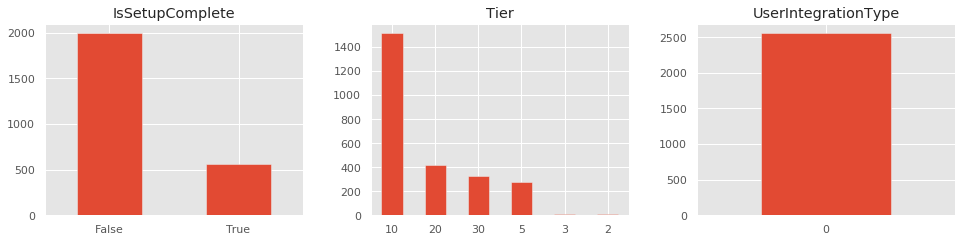

In [0]:
# categorical_features = ["IsSetupComplete", Tier", "UserIntegrationType"]

plt.style.use('ggplot')

fig, ax = plt.subplots(1, 3, figsize=(14, 4))
for i, categorical_feature in enumerate(categorical_features):
  df[categorical_feature].value_counts().plot(kind='bar', ax=ax[i], rot=0).set_title(categorical_feature)

fig.tight_layout(pad=3.0)

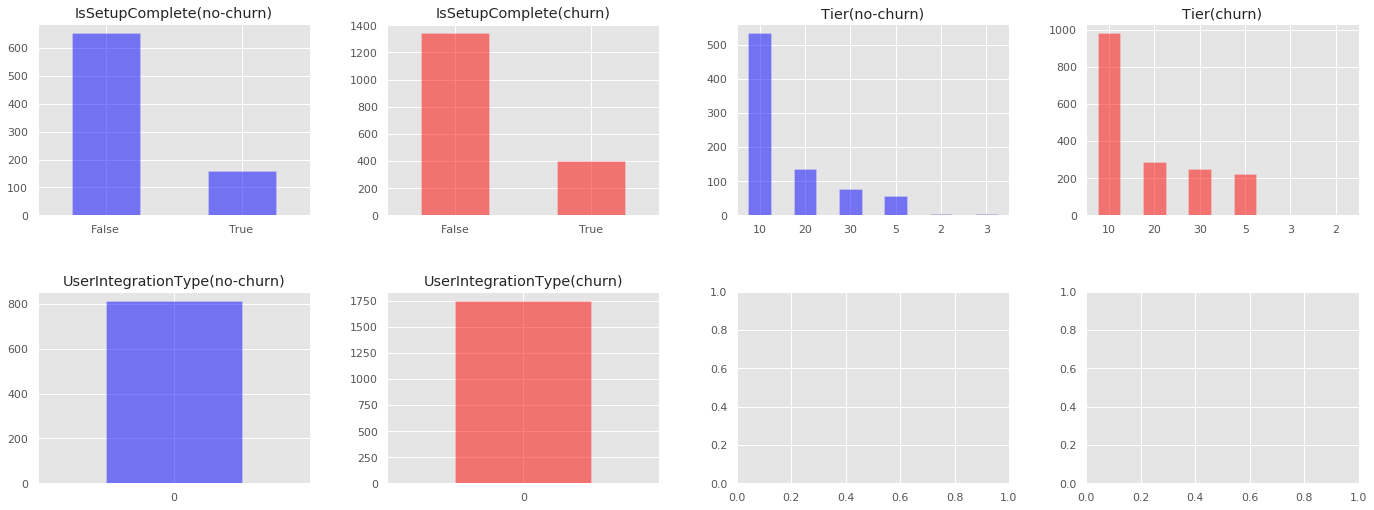

In [0]:
plt.style.use('ggplot')

# 2 row 4 col
fig, ax = plt.subplots(2, 4, figsize=(20, 8))

df[df.Churn == False]['IsSetupComplete'].value_counts().plot(kind='bar', color="blue", alpha=0.5, ax=ax[0, 0], rot=0).set_title('IsSetupComplete(no-churn)')
df[df.Churn == True]['IsSetupComplete'].value_counts().plot(kind='bar', color="red", alpha=0.5, ax=ax[0, 1], rot=0).set_title('IsSetupComplete(churn)')

df[df.Churn == False]['Tier'].value_counts().plot(kind='bar', color="blue", alpha=0.5, ax=ax[0, 2], rot=0).set_title('Tier(no-churn)')
df[df.Churn == True]['Tier'].value_counts().plot(kind='bar', color="red", alpha=0.5, ax=ax[0, 3], rot=0).set_title('Tier(churn)')

df[df.Churn == False]['UserIntegrationType'].value_counts().plot(kind='bar', color="blue", alpha=0.5, ax=ax[1, 0], rot=0).set_title('UserIntegrationType(no-churn)')
df[df.Churn == True]['UserIntegrationType'].value_counts().plot(kind='bar', color="red", alpha=0.5, ax=ax[1, 1], rot=0).set_title('UserIntegrationType(churn)')

fig.tight_layout(pad=4.0)

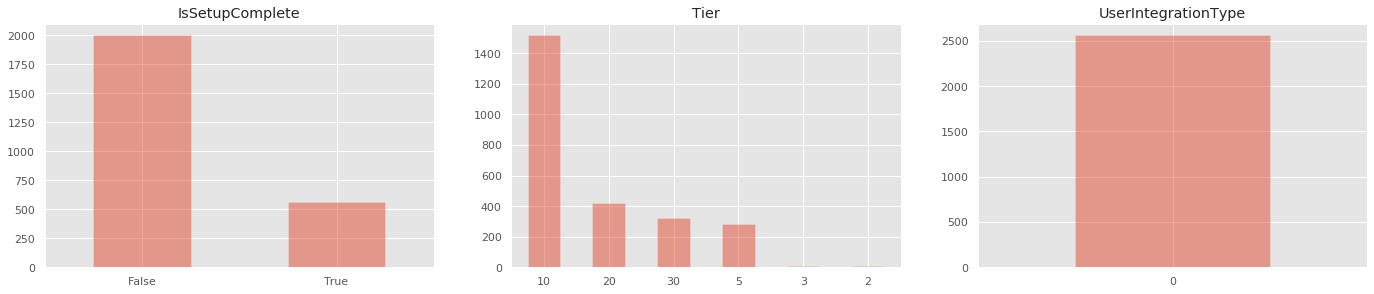

In [0]:
plt.style.use('ggplot')

# 2 row 4 col
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

df['IsSetupComplete'].value_counts().plot(kind='bar', alpha=0.5, ax=ax[0], rot=0).set_title('IsSetupComplete')

df['Tier'].value_counts().plot(kind='bar', alpha=0.5, ax=ax[1], rot=0).set_title('Tier')

df['UserIntegrationType'].value_counts().plot(kind='bar', alpha=0.5, ax=ax[2], rot=0).set_title('UserIntegrationType')

fig.tight_layout(pad=4.0)

Numerical feature distributions

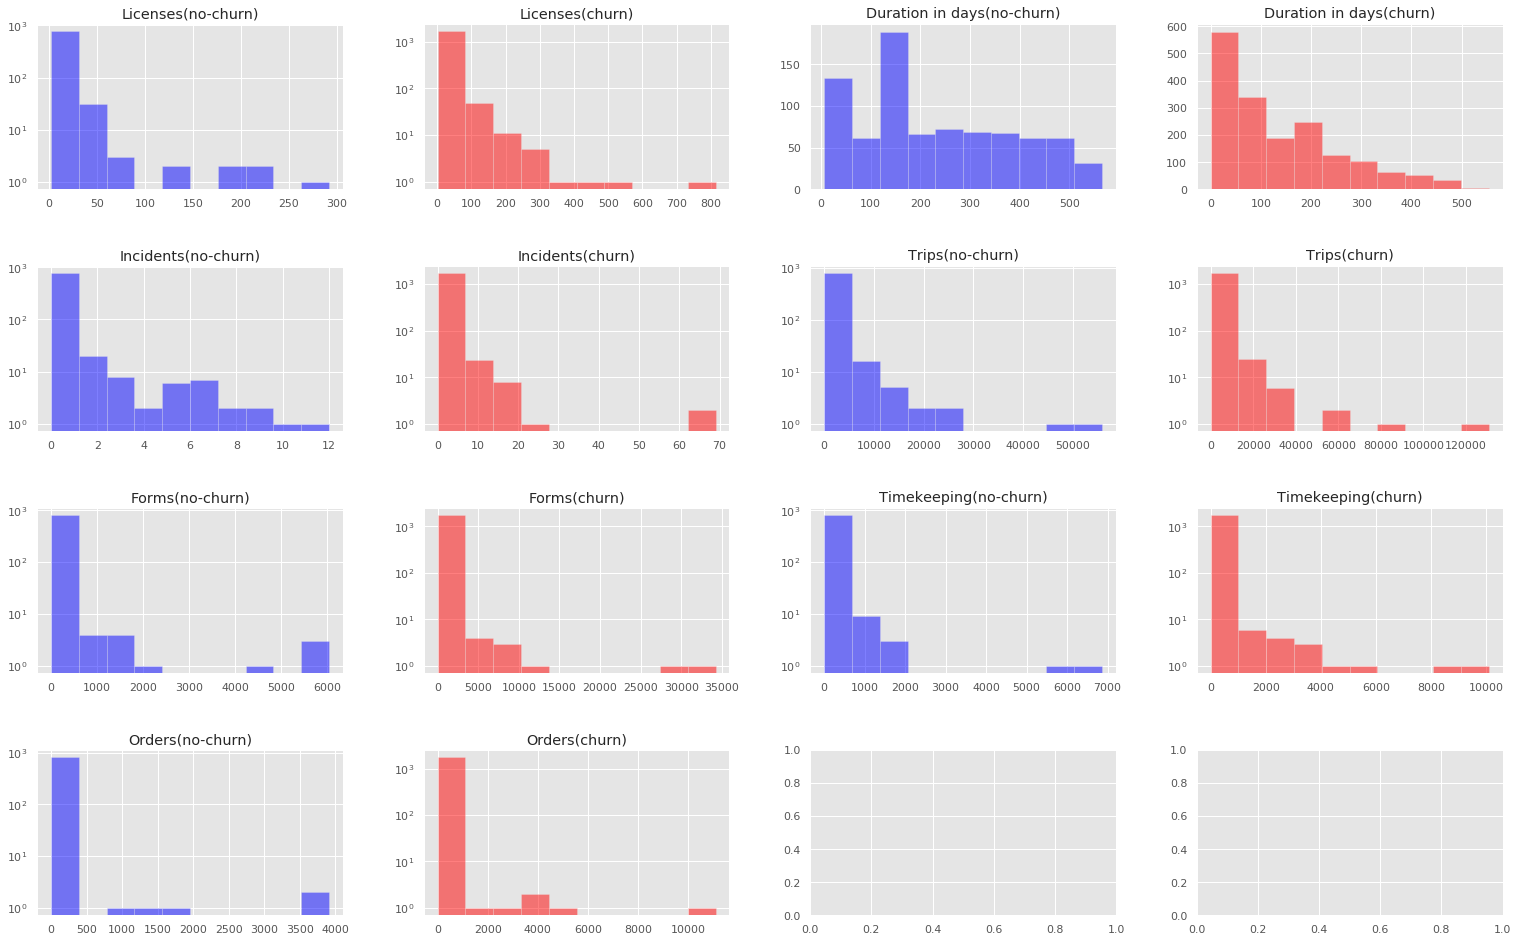

In [0]:
# numerical_features = ["Licenses", "Duration", "Incidents", "Trips", "Forms", "Timekeeping", "Orders"]

plt.style.use('ggplot')

rows, columns = 4, 4
fig, ax = plt.subplots(rows, columns, figsize=(22, 14))

df[df.Churn == False]["Licenses"].hist(bins=10, color="blue", alpha=0.5, ax=ax[0, 0]).set_title("Licenses(no-churn)")
df[df.Churn == True]["Licenses"].hist(bins=10, color="red", alpha=0.5, ax=ax[0, 1]).set_title("Licenses(churn)")
ax[0, 0].set_yscale('log')
ax[0, 1].set_yscale('log')

df[df.Churn == False]["Duration"].hist(bins=10, color="blue", alpha=0.5, ax=ax[0, 2]).set_title("Duration in days(no-churn)")
df[df.Churn == True]["Duration"].hist(bins=10, color="red", alpha=0.5, ax=ax[0, 3]).set_title("Duration in days(churn)")

df[df.Churn == False]["Incidents"].hist(bins=10, color="blue", alpha=0.5, ax=ax[1, 0]).set_title("Incidents(no-churn)")
df[df.Churn == True]["Incidents"].hist(bins=10, color="red", alpha=0.5, ax=ax[1, 1]).set_title("Incidents(churn)")
ax[1, 0].set_yscale('log')
ax[1, 1].set_yscale('log')

df[df.Churn == False]["Trips"].hist(bins=10, color="blue", alpha=0.5, ax=ax[1, 2]).set_title("Trips(no-churn)")
df[df.Churn == True]["Trips"].hist(bins=10, color="red", alpha=0.5, ax=ax[1, 3]).set_title("Trips(churn)")
ax[1, 2].set_yscale('log')
ax[1, 3].set_yscale('log')

df[df.Churn == False]["Forms"].hist(bins=10, color="blue", alpha=0.5, ax=ax[2, 0]).set_title("Forms(no-churn)")
df[df.Churn == True]["Forms"].hist(bins=10, color="red", alpha=0.5, ax=ax[2, 1]).set_title("Forms(churn)")
ax[2, 0].set_yscale('log')
ax[2, 1].set_yscale('log')

df[df.Churn == False]["Timekeeping"].hist(bins=10, color="blue", alpha=0.5, ax=ax[2, 2]).set_title("Timekeeping(no-churn)")
df[df.Churn == True]["Timekeeping"].hist(bins=10, color="red", alpha=0.5, ax=ax[2, 3]).set_title("Timekeeping(churn)")
ax[2, 2].set_yscale('log')
ax[2, 3].set_yscale('log')

df[df.Churn == False]["Orders"].hist(bins=10, color="blue", alpha=0.5, ax=ax[3, 0]).set_title("Orders(no-churn)")
df[df.Churn == True]["Orders"].hist(bins=10, color="red", alpha=0.5, ax=ax[3, 1]).set_title("Orders(churn)")
ax[3, 0].set_yscale('log')
ax[3, 1].set_yscale('log')

fig.tight_layout(pad=4.0)

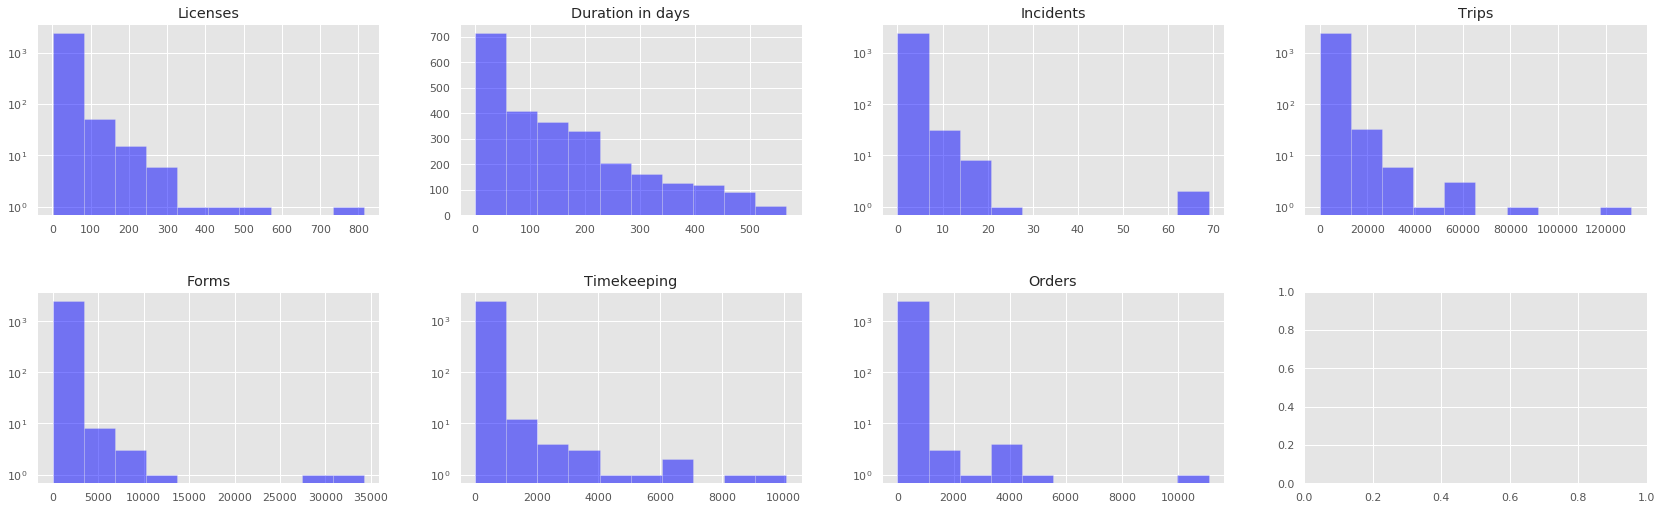

In [0]:
plt.style.use('ggplot')

rows, columns = 2, 4
fig, ax = plt.subplots(rows, columns, figsize=(24, 8))

df["Licenses"].hist(bins=10, color="blue", alpha=0.5, ax=ax[0, 0]).set_title("Licenses")
ax[0, 0].set_yscale('log')

df["Duration"].hist(bins=10, color="blue", alpha=0.5, ax=ax[0, 1]).set_title("Duration in days")

df["Incidents"].hist(bins=10, color="blue", alpha=0.5, ax=ax[0, 2]).set_title("Incidents")
ax[0, 2].set_yscale('log')

df["Trips"].hist(bins=10, color="blue", alpha=0.5, ax=ax[0, 3]).set_title("Trips")
ax[0, 3].set_yscale('log')

df["Forms"].hist(bins=10, color="blue", alpha=0.5, ax=ax[1, 0]).set_title("Forms")
ax[1, 0].set_yscale('log')

df["Timekeeping"].hist(bins=10, color="blue", alpha=0.5, ax=ax[1, 1]).set_title("Timekeeping")
ax[1, 1].set_yscale('log')

df["Orders"].hist(bins=10, color="blue", alpha=0.5, ax=ax[1, 2]).set_title("Orders")
ax[1, 2].set_yscale('log')

fig.tight_layout(pad=4.0)

Correlation Matrix and Heatmap

In [0]:
df_corr = df[categorical_features + [target] + numerical_features]

df_corr.corr()

,IsSetupComplete,Tier,UserIntegrationType,Churn,Licenses,Duration,Incidents,Trips,Forms,Timekeeping,Orders
IsSetupComplete,1.000000,0.126052,NaN,0.039486,0.104265,0.083370,0.168732,0.313432,0.135752,0.183338,0.109926
Tier,0.126052,1.000000,NaN,0.042594,0.077641,-0.021855,0.023792,0.040098,0.107324,0.130413,0.096270
UserIntegrationType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn,0.039486,0.042594,NaN,1.000000,0.126560,-0.302361,0.037725,0.019278,0.018985,0.002409,0.004434
Licenses,0.104265,0.077641,NaN,0.126560,1.000000,0.087952,0.187460,0.349444,0.407942,0.116717,0.098843
Duration,0.083370,-0.021855,NaN,-0.302361,0.087952,1.000000,0.083647,0.126078,0.053392,0.090844,0.040447
Incidents,0.168732,0.023792,NaN,0.037725,0.187460,0.083647,1.000000,0.173869,0.116761,0.036610,0.033537
Trips,0.313432,0.040098,NaN,0.019278,0.349444,0.126078,0.173869,1.000000,0.210205,0.324303,0.280723
Forms,0.135752,0.107324,NaN,0.018985,0.407942,0.053392,0.116761,0.210205,1.000000,0.216227,0.179101
Timekeeping,0.183338,0.130413,NaN,0.002409,0.116717,0.090844,0.036610,0.324303,0.216227,1.000000,0.374043


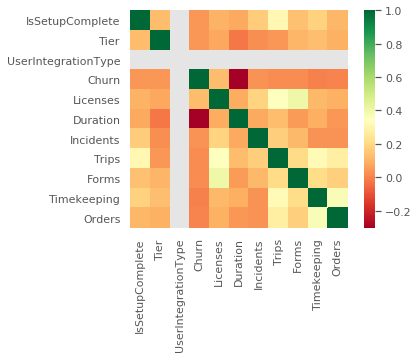

In [0]:
plt.style.use('ggplot')

sns.heatmap(df_corr.corr(), square=True, cmap='RdYlGn')

Sampled dataframe

In [0]:
df_sampled = df.sample(replace=False, frac=1, random_state=42)

df_sampled.shape

Out[25]: (2560, 24)

**Training**

In [0]:
df_final = df_sampled[categorical_features + [target] + numerical_features]

X = df_final.loc[:, df_final.columns != 'Churn']
y = df_final.loc[:, df_final.columns == 'Churn']

In [0]:
# training the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf = RandomForestClassifier(random_state=42)

# Setup the parameters and distributions to sample from: param_grid
# Parameter selections are based on the previous tuning.
# param_grid = {'classifier__max_depth': [3,4,5,6,7,8,None], 
#               'classifier__min_samples_leaf': np.arange(1, 5), 
#               'classifier__min_samples_split': np.arange(2, 5),
#               'classifier__class_weight': ['balanced', 'balanced_subsample', None],
#               'classifier__bootstrap': [False, True]
#              }

param_grid = {'max_depth': np.linspace(10, 30, 10, dtype=np.int32),
              'min_samples_leaf': np.arange(1, 5), 
              'min_samples_split': np.arange(2, 5),
              'class_weight': ['balanced'],
              'bootstrap': [True],
              'n_estimators': [50,60,70,80,90,100]
             }

tree_cv = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

tree_cv.fit(X_train, np.ravel(y_train))

pred = tree_cv.predict(X_test)

print("Tuned RandomForest: {}".format(tree_cv.best_params_))
print('Accuracy of RandomForest classifier on test set: {:.2f}'.format(tree_cv.score(X_test, y_test)))

# Log mlflow attributes for mlflow UI
mlflow.log_param("hyperparameters", tree_cv.best_params_)
mlflow.sklearn.log_model(tree_cv, "model")
mlflow.log_metric("accuracy", tree_cv.score(X_test, y_test))


Tuned RandomForest: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}
Accuracy of RandomForest classifier on test set: 0.76

**Testing **

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

precision recall f1-score support

 0 0.63 0.57 0.60 205
 1 0.81 0.84 0.82 435

 accuracy 0.76 640
 macro avg 0.72 0.71 0.71 640
weighted avg 0.75 0.76 0.75 640

Get model, class names & feature names

In [0]:
model = tree_cv.best_estimator_
class_names = [str(el) for el in model.classes_]
feature_names = categorical_features + numerical_features

print("Number of trees: {}".format(len(model)))
print("Feature names: {}".format(feature_names))
print("Class names: {}".format(class_names))

Number of trees: 80
Feature names: ['IsSetupComplete', 'Tier', 'UserIntegrationType', 'Licenses', 'Duration', 'Incidents', 'Trips', 'Forms', 'Timekeeping', 'Orders']
Class names: ['0', '1']

**Model Interpretation**

In [0]:
import shap

plt.style.use('ggplot')

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

print(len(shap_values[0]))
print(shap_values[0][0])

1920
[ 0.01224598 -0.00719724 0. 0.04914984 0.0158145 0.00337037
 -0.01470938 -0.0015162 0.00729656 0.00183625]

Summy plot: impact on mdoel output for **Churn and No-Churn**

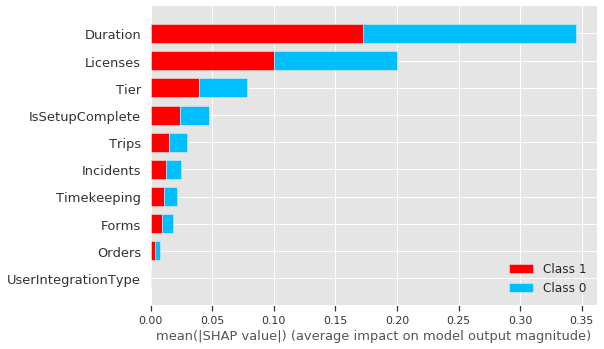

In [0]:
RGB_val = 255
blue = (0/RGB_val, 191/RGB_val, 255/RGB_val)
red= (255/RGB_val, 0/RGB_val, 0/RGB_val)
colors = [red, blue]
cmap = mpl.colors.ListedColormap(colors, name="CustomColors")

shap.summary_plot(shap_values, X_train, plot_type="bar", color=cmap)

Summary plot for **No-Churn**

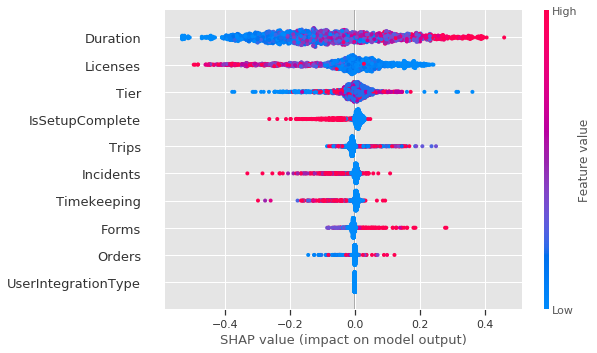

In [0]:
shap.summary_plot(shap_values[0], X_train)

Summary plot for **Churn**

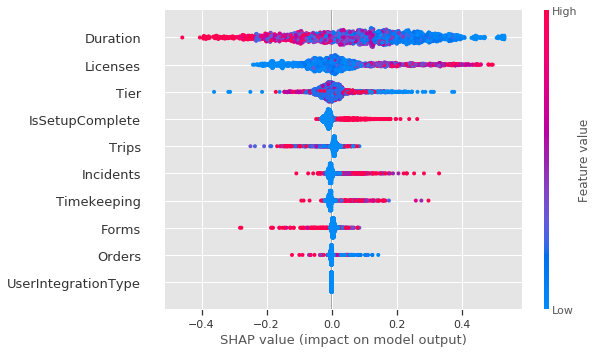

In [0]:
shap.summary_plot(shap_values[1], X_train)

Dependence plot for **Duration (No-Churn)**

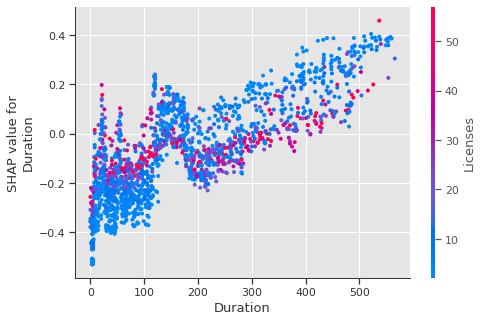

In [0]:
shap.dependence_plot('Duration', shap_values[0], X_train)

Dependence plot for **Duration (Churn)**

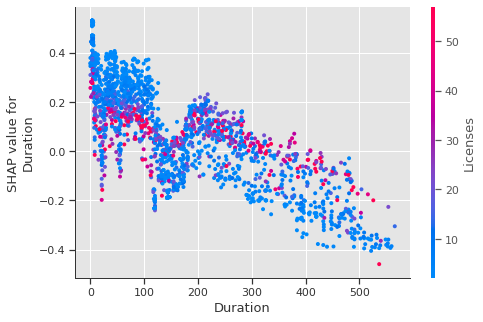

In [0]:
shap.dependence_plot('Duration', shap_values[1], X_train)

Decision plots for **Churn**

In [0]:
# get churn test data
y_churned = y_test[y_test.Churn == True]
X_churned = X_test.loc[y_churned.index]

# create predict pd with same index as y_test
y_pred = pd.DataFrame(data=pred,index=y_test.index)

# expected values
expected_value = explainer.expected_value
print(expected_value)

[0.50286522 0.49713478]

In [0]:
# we just pick 1 churn to display
X_display = X_churned.iloc[[0]]
df_sampled.loc[X_display.index]

,CompanyId,InstanceId,CompanyName,Tier,IsSetupComplete,UserIntegrationType,AccountId,AccountName,City,RegionName,PostalCode,CountryCode,Culture,Activation,Expiration,Deactivation,Duration,Churn,Licenses,Incidents,Trips,Forms,Timekeeping,Orders
895,17249,50,CRLLC COMMUNICATION SYSTEM,30,True,0,16568,Cal Reeves LLC,MELBOURNE,FL,32940,US,en-US,2019-08-30,2019-12-16,2019-12-19 00:01:03.560,111,1,12,2,0,55,26,64


In [0]:
# this is the predicted value compared to the acutal above.
y_pred.loc[X_display.index]

,0
895,1


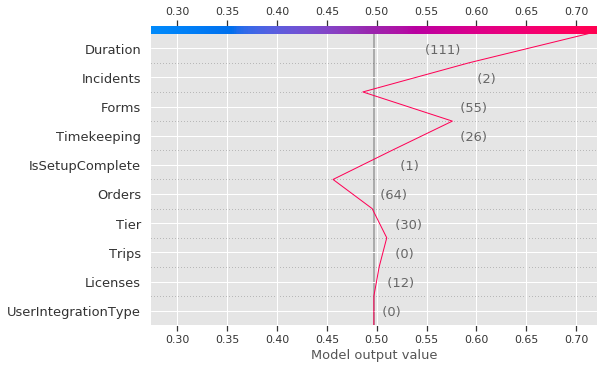

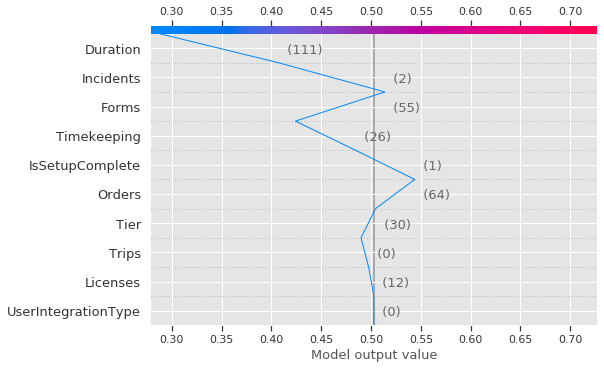

In [0]:
# Red is for class 1 (Churn)
shap_values_display = explainer.shap_values(X_display)
shap.decision_plot(expected_value[1], shap_values_display[1], X_display)

# Blue is for class 0 (No Churn)
shap_values_display = explainer.shap_values(X_display)
shap.decision_plot(expected_value[0], shap_values_display[0], X_display)

The above company has **Churn value > No-Churn. It is Churned!**   
Notes: This company shows Chance of churn > no-churn. As a comparison, you will see in the later cases that chance of no-churn is zero in terms of SHAP values.

In [0]:
X_display = X_churned.iloc[[1]]
df_sampled.loc[X_display.index]

,CompanyId,InstanceId,CompanyName,Tier,IsSetupComplete,UserIntegrationType,AccountId,AccountName,City,RegionName,PostalCode,CountryCode,Culture,Activation,Expiration,Deactivation,Duration,Churn,Licenses,Incidents,Trips,Forms,Timekeeping,Orders
1450,16167,50,VELASCO ZARATE,5,False,0,15051,VELASCO ZARATE,LOUISVILLE,None,40222,US,en-US,2019-05-18,2019-10-10,2019-10-10 00:13:51.690,145,1,5,0,0,0,0,0


In [0]:
# this is the predicted value compared to the acutal above.
y_pred.loc[X_display.index]

,0
1450,1


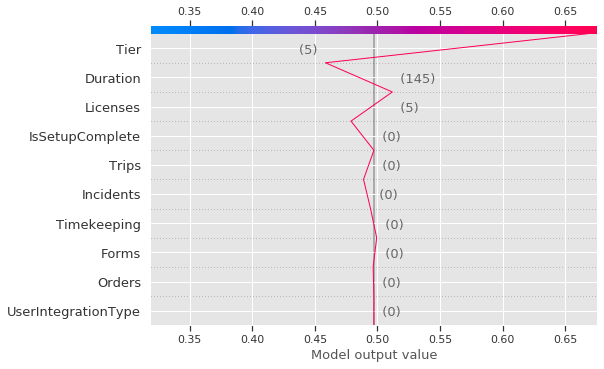

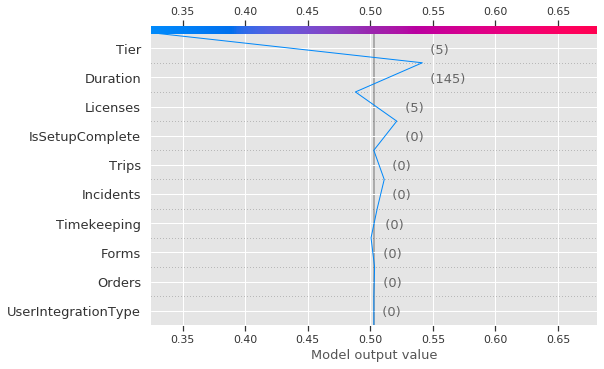

In [0]:
shap_values_display = explainer.shap_values(X_display)
shap.decision_plot(expected_value[1], shap_values_display[1], X_display)

shap_values_display = explainer.shap_values(X_display)
shap.decision_plot(expected_value[0], shap_values_display[0], X_display)

The above company has **Churn value > No-Churn. It is Churned!**

In [0]:
X_display = X_churned.iloc[[2]]
df_sampled.loc[X_display.index]

,CompanyId,InstanceId,CompanyName,Tier,IsSetupComplete,UserIntegrationType,AccountId,AccountName,City,RegionName,PostalCode,CountryCode,Culture,Activation,Expiration,Deactivation,Duration,Churn,Licenses,Incidents,Trips,Forms,Timekeeping,Orders
1661,15796,50,SOUTH HOLLAND METAL FINISHING,10,False,0,14673,SOUTH HOLLAND METAL FINISHING,MONEE,None,60449,US,en-US,2019-04-01,2019-10-18,2019-10-18 00:12:24.320,200,1,46,0,0,0,0,0


In [0]:
# this is the predicted value compared to the acutal above.
y_pred.loc[X_display.index]

,0
1661,1


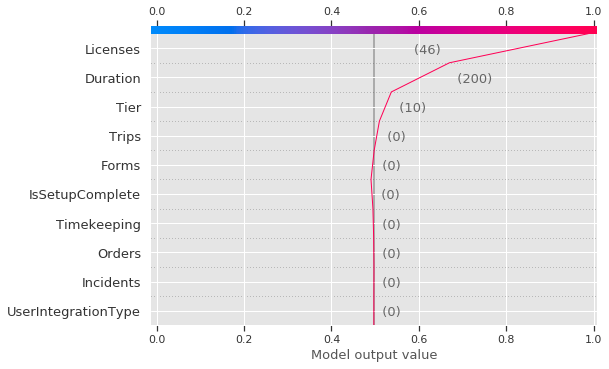

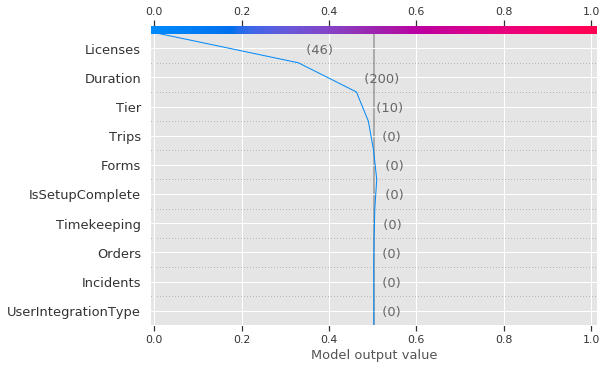

In [0]:
shap_values_display = explainer.shap_values(X_display)
shap.decision_plot(expected_value[1], shap_values_display[1], X_display)

shap_values_display = explainer.shap_values(X_display)
shap.decision_plot(expected_value[0], shap_values_display[0], X_display)

The above company has **Churn value > No-Churn. It is Churned!**

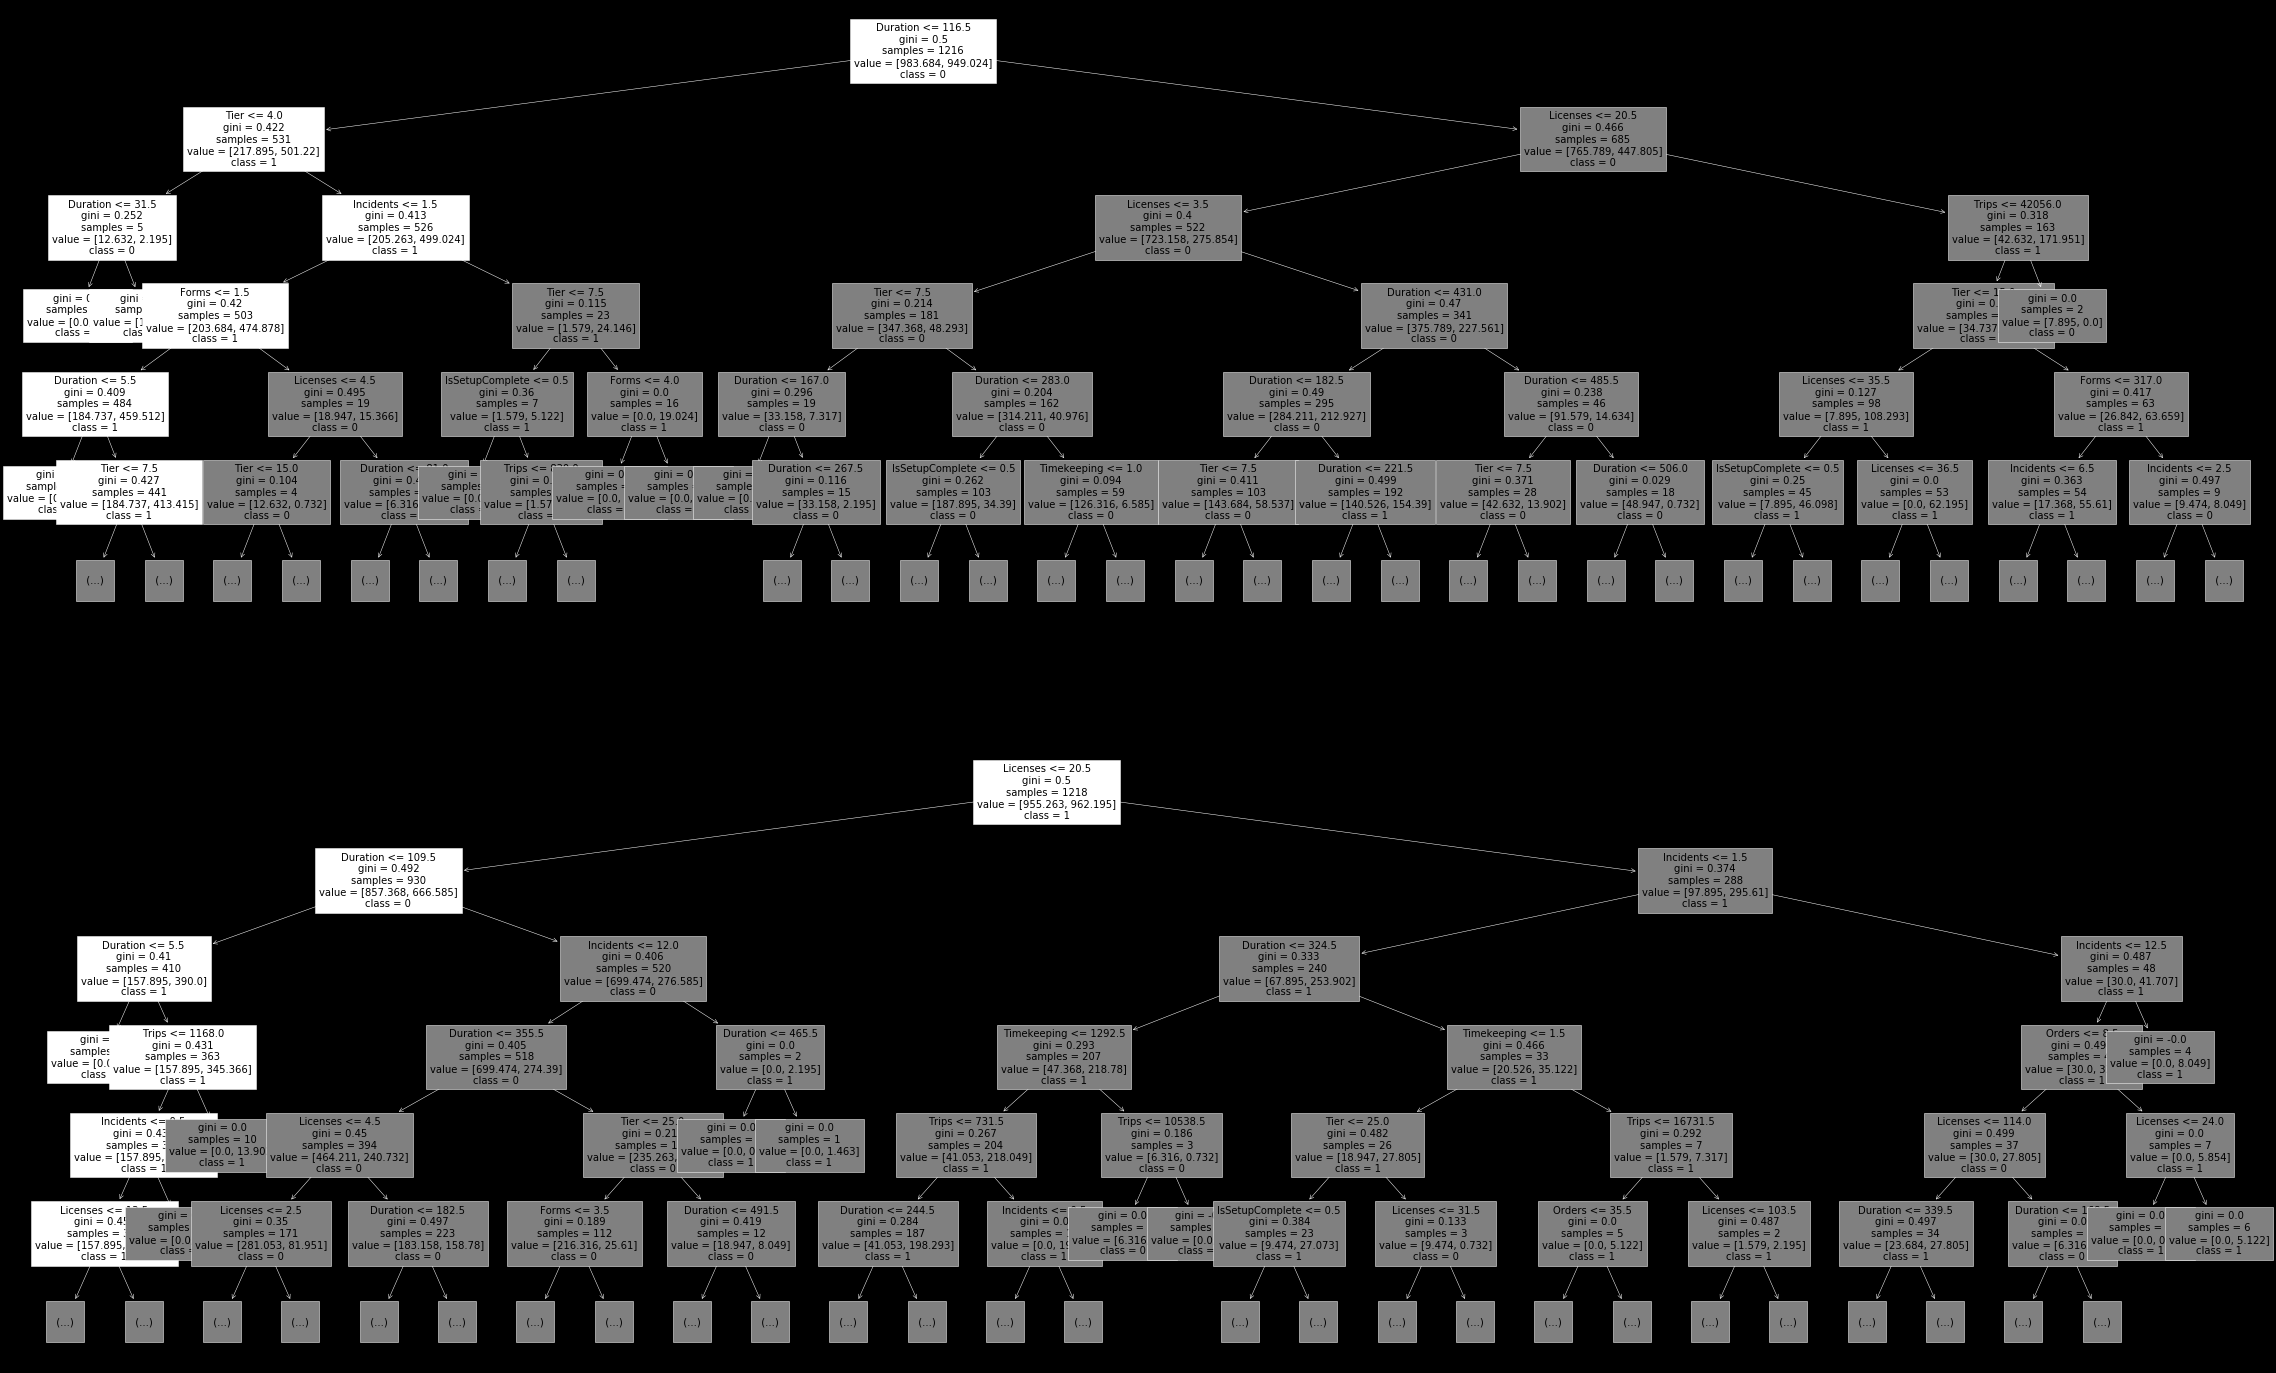

In [0]:
from sklearn import tree

plt.style.use('dark_background')
mpl.rcParams['text.color'] = 'black'

fig, ax = plt.subplots(2, figsize=(40, 25))

tree.plot_tree(decision_tree = model[0],
               feature_names = feature_names, 
               class_names = class_names,
               fontsize = 10,
               proportion = False,
               rounded = False,
               max_depth = 5,
               ax = ax[0])

tree.plot_tree(decision_tree = model[1],
               feature_names = feature_names, 
               class_names = class_names,
               fontsize = 10,
               proportion = False,
               rounded = False,
               max_depth = 5,
               ax = ax[1])

plt.show()

In [0]:
mlflow.end_run()